In [1]:
import neurolab as nl
import matplotlib.pyplot as plt

In [2]:
myinput = [[0, 0], [0, 1], [1, 0], [1, 1]]
output = [[0], [0], [0], [1]]

In [3]:
net = nl.net.newp([[0, 1], [0, 1]], 1)

In [4]:
error_progress = net.train(myinput, output, epochs = 100, show = 10, lr = 0.1)

The goal of learning is reached


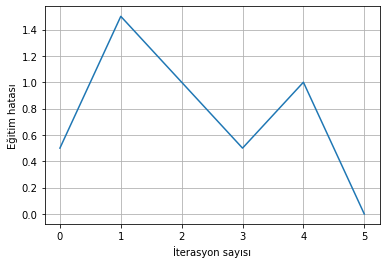

In [5]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('İterasyon sayısı')
plt.ylabel('Eğitim hatası')
plt.grid()
plt.show()

In [6]:
#Tek Katmanlı Sinir Ağları

In [7]:
import numpy as np

In [8]:
input_data = np.loadtxt("data/neural_simple.txt", delimiter = ',')

array([[2. , 4. , 0. , 0. ],
       [1.5, 3.9, 0. , 0. ],
       [2.2, 4.1, 0. , 0. ],
       [1.9, 4.7, 0. , 0. ],
       [5.4, 2.2, 0. , 1. ],
       [4.3, 7.1, 0. , 1. ],
       [5.8, 4.9, 0. , 1. ],
       [6.5, 3.2, 0. , 1. ],
       [3. , 2. , 1. , 0. ],
       [2.5, 0.5, 1. , 0. ],
       [3.5, 2.1, 1. , 0. ],
       [2.9, 0.3, 1. , 0. ],
       [6.5, 8.3, 1. , 1. ],
       [3.2, 6.2, 1. , 1. ],
       [4.9, 7.8, 1. , 1. ],
       [2.1, 4.8, 1. , 1. ]])

In [9]:
data = input_data[:, 0:2]
labels = input_data[:, 2:]

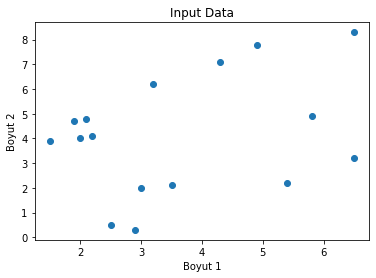

In [11]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Input Data')
plt.show()

In [12]:
dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()

In [13]:
nn_output_layer = labels.shape[1]

In [14]:
nn_output_layer

2

In [19]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
neural_net = nl.net.newp([dim1, dim2], nn_output_layer)

In [20]:
error = neural_net.train(data, labels, epochs = 200, show = 20, lr = 0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


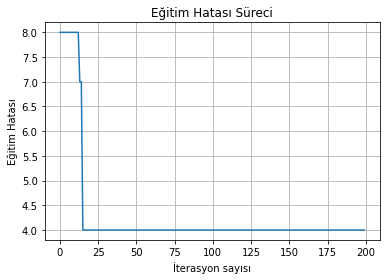

In [21]:
plt.figure()
plt.plot(error)
plt.xlabel('İterasyon sayısı')
plt.ylabel('Eğitim Hatası')
plt.title('Eğitim Hatası Süreci')
plt.grid()
plt.show()

In [22]:
print('\nTest Results:')
data_test = [[1.5, 3.2], [3.6, 1.7], [3.6, 5.7], [1.6, 3.9]] 
for item in data_test:
    print(item, '-->', neural_net.sim([item])[0])


Test Results:
[1.5, 3.2] --> [1. 0.]
[3.6, 1.7] --> [1. 0.]
[3.6, 5.7] --> [1. 1.]
[1.6, 3.9] --> [1. 0.]


In [23]:
#Çok katmanlı Sinir Ağları
#y = 2x^2 + 8

In [24]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

In [25]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

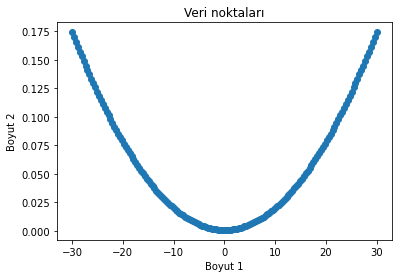

In [27]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Veri noktaları')
plt.show()

In [28]:
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [29]:
neural_net.trainf = nl.train.train_gd

In [30]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 0.9325121276400861;
Epoch: 200; Error: 0.0260204184575613;
Epoch: 300; Error: 0.02078589264055289;
The goal of learning is reached


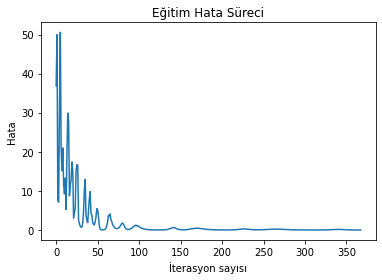

In [31]:
plt.figure()
plt.plot(error)
plt.xlabel('İterasyon sayısı')
plt.ylabel('Hata')
plt.title('Eğitim Hata Süreci')
plt.show()

In [32]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

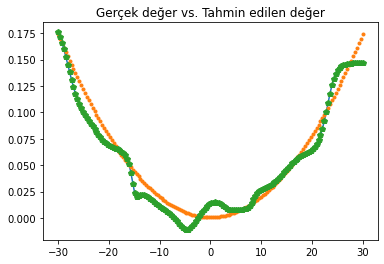

In [33]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Gerçek değer vs. Tahmin edilen değer')
plt.show()

In [4]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [5]:
matrix1 = np.array([(2,2,2), (2,2,2), (2,2,2)], dtype = 'int32')
matrix2 = np.array([(1,1,1), (1,1,1), (1,1,1)], dtype = 'int32')
print(matrix1)
print(matrix2)

matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

matrix3 = np.array([(2,7,2), (1,4,2), (9,0,2)], dtype = 'float32')
print(matrix3)
matrix_det = tf.matrix_determinant(matrix3)

with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)
    
print(result1)
print(result2)
print(result3)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
55.999992


In [9]:
"""
red, green, blue
1     0     0
0     1     0
0     0     1
"""

'\nred, green, blue\n1     0     0\n0     1     0\n0     0     1\n'

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)

#integer encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

['cold' 'cold' 'warm' 'cold' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 2 0 2 1]


In [12]:
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [14]:
from numpy import argmax
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


In [15]:
#Tensorflow ile SLP (Tek Katmanlı Algılayıcı)

In [16]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data", one_hot = True)

#Parametreler
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

activation = tf.nn.softmax(tf.matmul(x, W) + b)

Extracting /data\train-images-idx3-ubyte.gz
Extracting /data\train-labels-idx1-ubyte.gz
Extracting /data\t10k-images-idx3-ubyte.gz
Extracting /data\t10k-labels-idx1-ubyte.gz
